In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic.csv',usecols = ['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
712,1,48.0,52.0000
193,1,3.0,26.0000
381,1,1.0,15.7417
12,0,20.0,8.0500
408,0,21.0,7.7750


<ipython-input-15-508f8cbcd459>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist = False)


<Axes: xlabel='Age', ylabel='Density'>

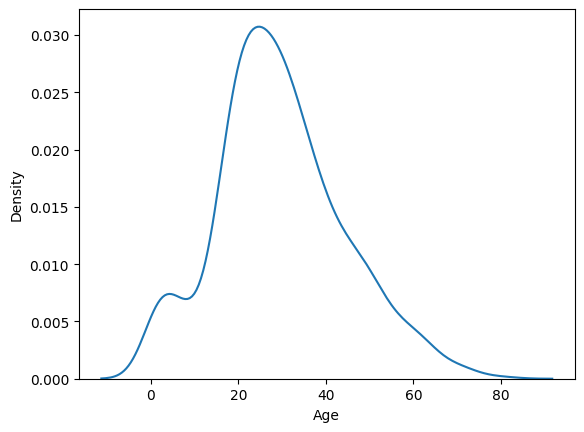

In [ ]:
sns.distplot(df['Age'],hist = False)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

NameError: name 'df' is not defined

In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
x.head(5)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.2)

<ipython-input-23-c6382ebe8207>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


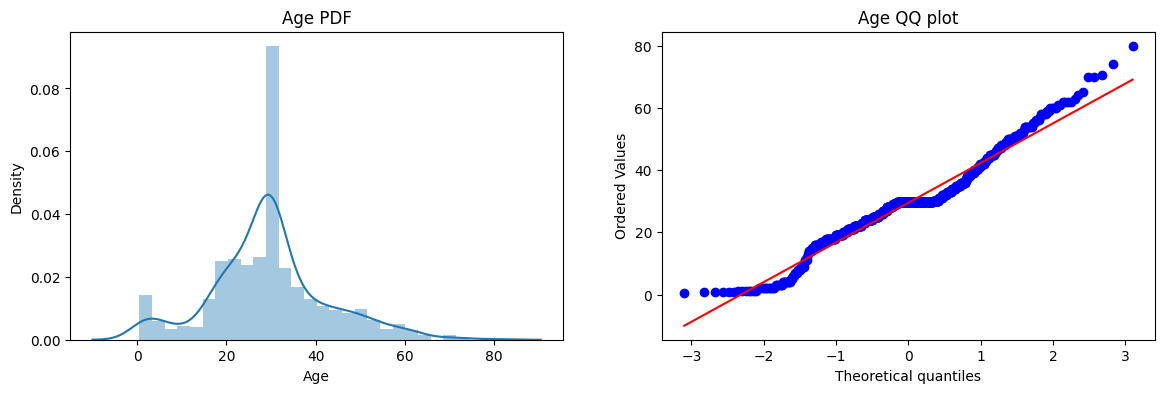

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('Age QQ plot')
plt.show()

<ipython-input-25-2177b8fc611a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


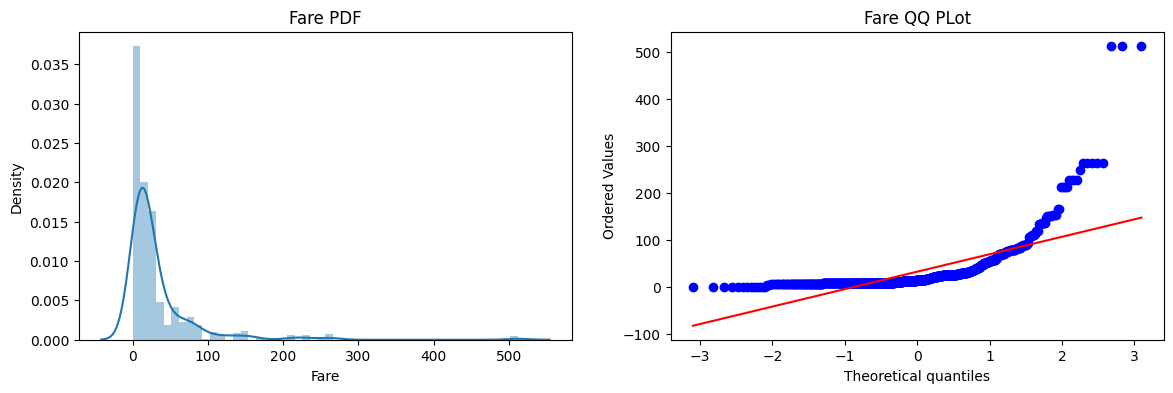

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare QQ PLot')
plt.show()

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)
print('accuracy for LR:',accuracy_score(y_test,y_pred))
print('accuracy for DT:',accuracy_score(y_test,y_pred1))

accuracy for LR: 0.6480446927374302
accuracy for DT: 0.659217877094972


In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [ ]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)
clf.fit(x_train_transformed,y_train)
clf1.fit(x_train_transformed,y_train)
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf1.predict(x_test_transformed)
print('accuracy for LR:',accuracy_score(y_test,y_pred))
print('accuracy for DT:',accuracy_score(y_test,y_pred1))

accuracy for LR: 0.6815642458100558
accuracy for DT: 0.6871508379888268


In [ ]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring= 'accuracy',cv = 10)))
print('DT',np.mean(cross_val_score(clf1,x_transformed,y,scoring= 'accuracy',cv = 10)))

LR 0.678027465667915
DT 0.6543820224719101
